In [1]:
# 구글 드라이브 MOUNT
from google.colab import drive
drive.mount('/content/drive')

# github와 연동하고 싶은 폴더로 이동
%cd /content/drive/MyDrive/study_DL/Study_DL

Mounted at /content/drive
/content/drive/MyDrive/study_DL/Study_DL


# 1. 컨브넷 학습 시각화
- 연속된 커브넷 층이 입력을 어떻게 변형시키는지 이해하고 개별적 컨브넷 필터의 의미 파악


## 저장된 모델 불러오기

In [4]:
from tensorflow.keras.models import load_model

In [6]:
model = load_model('230202_cats_and_dogs_2.h5')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 17, 17, 128)    

## 이미지 불러오기

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [27]:
# 이미지 한개 출력
img_path = '../필요데이터/cats_and_dogs_small/test/cats/cat.1700.jpg'

cat_img = image.load_img(img_path, target_size = (150, 150))
cat_img_arr = image.img_to_array(cat_img)
cat_img_arr.shape

(150, 150, 3)

In [28]:
# 이미지 텐서를 4차원으로 변경
cat_img_arr = cat_img_arr.reshape(((1,)+ cat_img_arr.shape))
cat_img_arr.shape

(1, 150, 150, 3)

In [29]:
# 픽셀값 스케일링
cat_img_arr *= 1./255
cat_img_arr[0]

array([[[0.6431373 , 0.68235296, 0.7294118 ],
        [0.6313726 , 0.67058825, 0.7176471 ],
        [0.62352943, 0.67058825, 0.7254902 ],
        ...,
        [0.77647066, 0.83921576, 0.94117653],
        [0.7843138 , 0.8470589 , 0.9490197 ],
        [0.7843138 , 0.8470589 , 0.9490197 ]],

       [[0.627451  , 0.6666667 , 0.7137255 ],
        [0.6156863 , 0.654902  , 0.7019608 ],
        [0.6117647 , 0.65882355, 0.7137255 ],
        ...,
        [0.7803922 , 0.8431373 , 0.9450981 ],
        [0.78823537, 0.85098046, 0.95294124],
        [0.78823537, 0.85098046, 0.95294124]],

       [[0.6313726 , 0.67058825, 0.7176471 ],
        [0.62352943, 0.6627451 , 0.70980394],
        [0.61960787, 0.6666667 , 0.72156864],
        ...,
        [0.7803922 , 0.8431373 , 0.9450981 ],
        [0.7803922 , 0.8431373 , 0.9450981 ],
        [0.7803922 , 0.8431373 , 0.9450981 ]],

       ...,

       [[0.25882354, 0.19607845, 0.20784315],
        [0.21176472, 0.14509805, 0.16862746],
        [0.12156864, 0

## 시각화 : 원본

In [30]:
import matplotlib.pyplot as plt

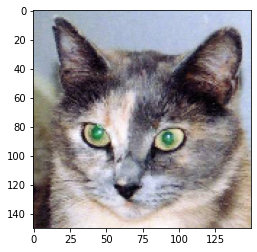

In [32]:
plt.imshow(cat_img_arr[0])
plt.show()

## 시각화 : 컨브넷 층별 변화 

### 입력텐서 및 출력텐서 리스트로 모델 객체 만들기

In [33]:
from keras import models

In [35]:
layer_outputs = [layer.output for layer in model.layers[:8]]

activations_model = models.Model(inputs = model.input, outputs = layer_outputs)

### 예측 모드로 모델 실행하기

In [36]:
activations = activations_model.predict(cat_img_arr)

1/1 [==============================] - 0s 462ms/step


In [43]:
for i in range(8):
  print(f'{i+1}번째 layer 이름: {layer_outputs[i].name}')
  print(f'\t shape: {activations[i].shape}')
  print()

1번째 layer 이름: conv2d_42/Relu:0
	 shape: (1, 148, 148, 32)

2번째 layer 이름: max_pooling2d_41/MaxPool:0
	 shape: (1, 74, 74, 32)

3번째 layer 이름: conv2d_43/Relu:0
	 shape: (1, 72, 72, 64)

4번째 layer 이름: max_pooling2d_42/MaxPool:0
	 shape: (1, 36, 36, 64)

5번째 layer 이름: conv2d_44/Relu:0
	 shape: (1, 34, 34, 128)

6번째 layer 이름: max_pooling2d_43/MaxPool:0
	 shape: (1, 17, 17, 128)

7번째 layer 이름: conv2d_45/Relu:0
	 shape: (1, 15, 15, 128)

8번째 layer 이름: max_pooling2d_44/MaxPool:0
	 shape: (1, 7, 7, 128)



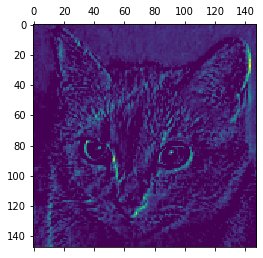

In [45]:
plt.matshow(activations[0][0, :, : ,19])

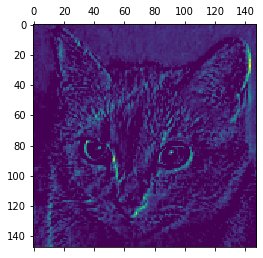

In [46]:
plt.matshow(activations[0][0, :, : ,19], cmap = 'viridis')

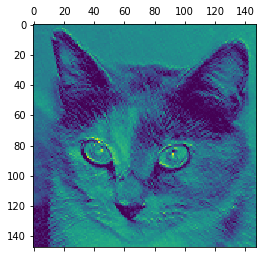

In [47]:
plt.matshow(activations[0][0, :, : ,15], cmap = 'viridis')

### 중간층의 모든 활성화에 있는 채널 시각화

In [52]:
layers_name = [layer.name for layer in model.layers[:8]]

# 세로축
ncols = 16

for layer_name, layer_activation in zip(layers_name, activations):
  # 채널 수
  n_features = layer_activation.shape[-1]

  # 이미지 크기
  size = layer_activation.shape[1]  # (150,150)

  # 가로축
  nrows = n_features // ncols
  display_grid = np.zeros((size * nrows, size * ncols))
  
  for row in range(nrows):
    for col in range(ncols):
      channel_img = layer_activation[0, :, :, row * ncols + col]
      
      # 그래프로 나타나기 좋게 특성처리함
      channel_img -= channel_img.mean()
      channel_img /= channel_img.std()
      channel_img *= 64
      channel_img += 128
      channel_img = np.clip(channel_img, 0, 255).astype('uint8')
      display_grid[row * size: (row + 1) * size, col * size : (col + 1) * size] = channel_img

  scale = 1./ size
  plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
  
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 2. 컨브넷 필터 시각화
- 컨브넷 필터가 찾으려는 시각적인 패턴과 개념 확인

In [73]:
from keras.applications import VGG16
from keras import backend as K

In [74]:
# pretrained vgg16모델 불러오기
model = VGG16(weights = 'imagenet',
              include_top = False)

# block3_conv1 합성곱 층의 output
layer_output = model.get_layer('block3_conv1').output

# 0번째 필터의 값을 최대화하는 손실 함수 정의
loss = K.mean(layer_output[:, :, :, 0])

In [76]:
# 경사 상승법 구현을 위한 모델의 입력에 대한 손실 그래디언트 객체화
grads = K.gradients(loss, model.input)[0]
grads

<tf.Tensor 'gradients_3/block1_conv1/Conv2D_grad/Conv2DBackpropInput:0' shape=(None, None, None, 3) dtype=float32>

In [77]:
# 그래디언트 정규화

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
grads

<tf.Tensor 'truediv:0' shape=(None, None, None, 3) dtype=float32>

In [78]:
# 입력값에 대한 넘파이 출력값 구하기

iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [80]:
set(loss_value.reshape(-1)), set(grads_value.reshape(-1))

({0.0}, {0.0})

In [81]:
# 파이썬 루프를 만들어 확률적 경사 상승법 구성하고, 손실 최대화하기
input_img_data = np.random.random((1,150,150,3)) * 20 + 128.   # 노이즈가 섞인 회색 이미지로 시작함

step = 1.
# 40번의 경사 상승법 실행
for i in range(40):
  # 손실과 그래디언트 계산
  loss_value, grads_value = iterate([input_img_data])

  # 손실을 최대화하는 방향으로 입력 이미지 수정
  input_img_data += grads_value * step


In [82]:
input_img_data

array([[[[144.8084984 , 148.60924403, 149.95470484],
         [139.94400291, 143.45725936, 133.41365124],
         [134.76647711, 139.74661543, 129.74050098],
         ...,
         [141.80316868, 144.47258561, 136.49724551],
         [144.42289092, 136.04452536, 145.01883755],
         [144.92437664, 142.08031417, 136.4589066 ]],

        [[145.49881784, 143.82869479, 144.66979995],
         [128.84272115, 125.40452175, 132.2490058 ],
         [133.89400252, 127.34288712, 120.11769318],
         ...,
         [135.52951742, 127.34380206, 138.75189728],
         [144.20068514, 143.88531509, 129.36411495],
         [138.02766241, 136.5164294 , 139.43506139]],

        [[139.62568308, 130.90621859, 130.34161454],
         [141.99353765, 138.55512244, 144.19175439],
         [131.90171259, 119.00895898, 130.14736825],
         ...,
         [151.69066917, 134.6345336 , 131.5400582 ],
         [142.30045037, 139.43366546, 135.90886621],
         [140.42354322, 148.31478497, 142.22990523]],

In [90]:
# 경사하강법을 적용한 텐서를 이미지 형태로 변환하기 위한 사용자 함수
def deprocess_image(x):
  # 평균 0, 표준편차 1인 표준정규화
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  # [0, 1]로 클리핑
  x += 0.5
  x = np.clip(x, 0, 1)

  # RGB 배열로 변환
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [91]:
# 층 이름, 필터 번호 입력으로 필터 시각화 이미지 사용자함수 생성

def generate_pattern(layer_name, filter_index, size = 150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :,filter_index])

  grads = K.gradients(loss, model.input)[0]

  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([model.input], [loss, grads])

  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

  img = input_img_data[0]
  return deprocess_image(img)

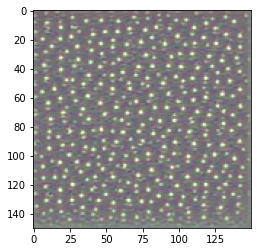

In [92]:
plt.imshow(generate_pattern('block3_conv1', 0))

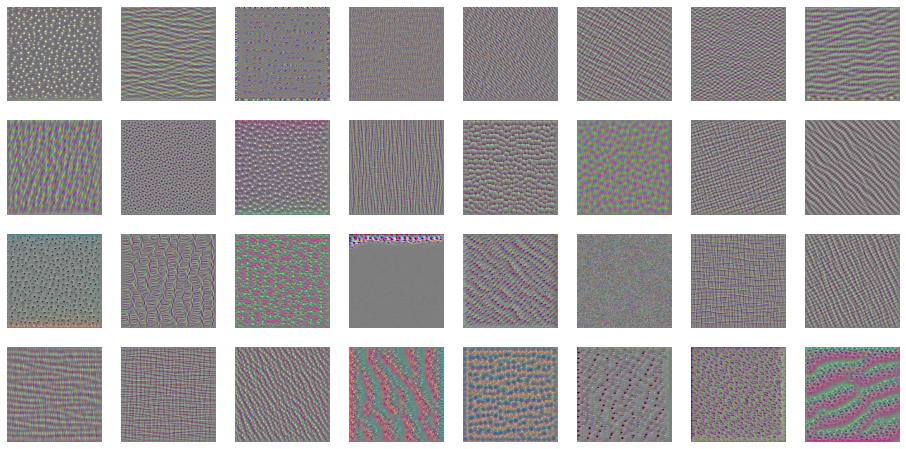

In [94]:
plt.figure(figsize = (16, 8))
for i in range(32):
  plt.subplot(4, 8, i + 1)
  plt.axis('off')
  plt.imshow(generate_pattern('block3_conv1', i))
plt.show()

In [ ]:
# 각 층에서 처음 64개의 필터만 사용하기
# 각 합성곱 블럭(block1_conv1, block2_conv1, block3_conv1, block4_conv1, block5_conv1)의 첫 번째 층만 살펴보기

for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 결과를 담을 빈 (검은) 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

    for i in range(8):  # results 그리드의 행을 반복합니다
        for j in range(8):  # results 그리드의 열을 반복합니다
            # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # results 그리드의 (i, j) 번째 위치에 저장합니다
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # results 그리드를 그립니다
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 3. 클래스 활성화에 대한 히트맵을 이미지에 시각화
- 이미지의 어느 부분이 주어진 클래스에 속하는 데 기여했는지 히트맵으로 시각화
- 분류에 실수가 있는 경우 컨브넷의 결정 과정을 디버깅하는 데 도움이 됨
- 또, 이미지에 특정 물체가 있는 위치를 파악하는 데 사용할 수 있음
- 이 기법의 종류를 일반적으로 <b>클래스 활성화 맵(CAM, Class Activation Map)</b>시각화라고 부름
- 특정 출력 클래스에 대해 입력 이미지의 모든 위치를 계산한 2D 점수 그리드임
  - 예를 들어, 강아지/고양이 컨브넷에 한 이미지를 주입하면, CAM 시각화는 고양이 클래스에 대한 히트맵을 생성하여 이미지에서 고양이와 비슷한 부분을 알려줌
- 여기서 사용할 구체적인 구현은 Grad-CAM:Visual Explanations from Deep Networks via Gradient-based Localization에 기술되어 있는 것임
  1. 입력 이미지가 주어지면 합성곱 층에 있는 특성 맵의 출력을 추출함
  2. 그 다음 특성 맵의 모든 채널 출력에 채널에 대한 클래스의 그래디언트 평균을 곱함


### vgg16 모델 로드

In [96]:
from keras.applications import VGG16

model = VGG16(weights = 'imagenet')

553467096/553467096 [==============================] - 21s 0us/step


In [103]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 이미지 불러와서 모델 입력에 맞게 전처리하기

In [101]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [104]:
img = image.load_img('../필요데이터/elephant.jpg', target_size = (224,224))
img_arr = image.img_to_array(img)
img_arr.shape

(224, 224, 3)

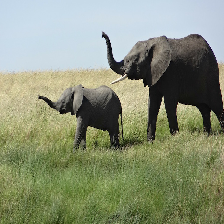

In [110]:
img

In [105]:
img_arr = img_arr.reshape((1,) + img_arr.shape)
img_arr.shape

(1, 224, 224, 3)

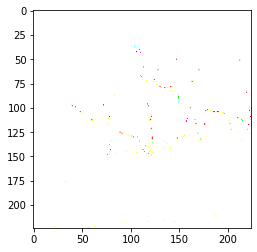

In [111]:
plt.imshow(img_arr[0])

In [112]:
# 채널별 컬러별 정규화
img_arr = preprocess_input(img_arr)
img_arr.shape

(1, 224, 224, 3)

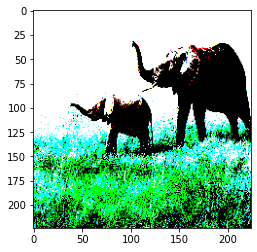

In [113]:
plt.imshow(img_arr[0])

### 모델로 예측하기

In [114]:
# 예측
preds = model.predict(img_arr)

print(f'Predicted: {decode_predictions(preds, top = 3)}')

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n02504458', 'African_elephant', 0.90942115), ('n01871265', 'tusker', 0.08618289), ('n02504013', 'Indian_elephant', 0.004354583)]]


### Grad-CAM 알고리즘 만들기

In [117]:
preds.shape

(1, 1000)

In [115]:
# 예측 벡터에서 최대로 활성화된 항목의 인덱스 
np.argmax(preds[0])

386

In [118]:
model.output[:, 386]

<tf.Tensor 'strided_slice_325:0' shape=(None,) dtype=float32>

In [119]:
# 예측 벡터의 아프리카 코끼리 항목
african_elephant_output = model.output[:, 386]

# 마지막 컨브넷 층 특성맵
last_conv_layer = model.get_layer('block5_conv3')

# 마지막 컨브넷 층의 특성맵 출력에 대한 '아프리카 코끼리' 클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
print(grads.shape)

(None, 14, 14, 512)


In [121]:
# 특성맵 채널별 그래디언트 평균값이 담긴 (512, )크기의 벡터
pooled_grads = K.mean(grads, axis = (0,1,2))
print(pooled_grads)

Tensor("Mean_650:0", shape=(512,), dtype=float32)


In [123]:
# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성맵 출력을 구함
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

# 두마리 코끼리 있는 샘플 이미지 주입하고 2개의 넘파이배열 받음
pooled_grads_value, conv_layer_output_value = iterate([img_arr])
pooled_grads_value.shape, conv_layer_output_value.shape

((512,), (14, 14, 512))

In [126]:
# '아프리카코끼리' 클래스에 대한 '채널의 중요도'를 특성 맵 배열의 채널에 곱함
for i in range(512):
  conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

In [133]:
print(conv_layer_output_value.shape)

print(np.mean(conv_layer_output_value, axis = -1).shape)

(14, 14, 512)
(14, 14)


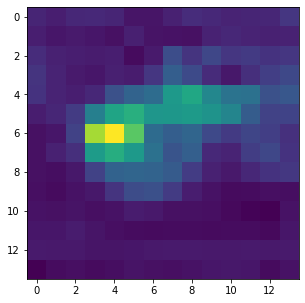

In [147]:
# 만들어진 특성맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵임
## axis = -1의 의미는 마지막 차원
heatmap = np.mean(conv_layer_output_value, axis = -1)

plt.figure(figsize = (30, 5))
plt.imshow(heatmap)

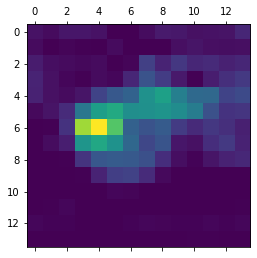

In [148]:
# 히트맵 후처리
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

### 히트맵과 원본 이미지 겹치기

In [149]:
import cv2

In [150]:
img = cv2.imread('../필요데이터/elephant.jpg')

# 원본 이미지 크기에 맞춰서 resize
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

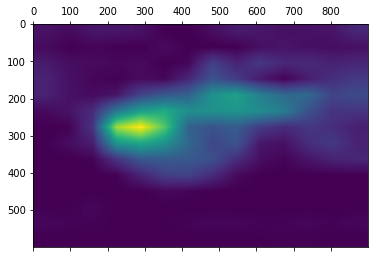

In [151]:
plt.matshow(heatmap)

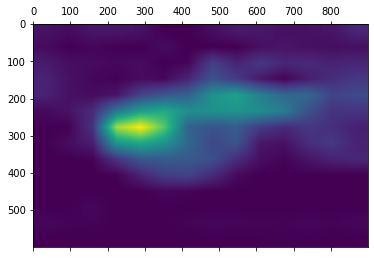

In [152]:
# heatmap을 RGB 포맷으로 변환

heatmap = np.uint8(255 * heatmap)
plt.matshow(heatmap)

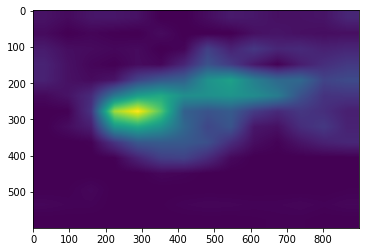

In [153]:
plt.imshow(heatmap)

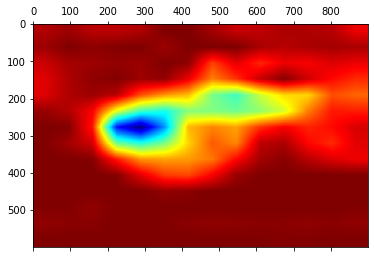

In [154]:
# 히트맵으로 변환
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
plt.matshow(heatmap)

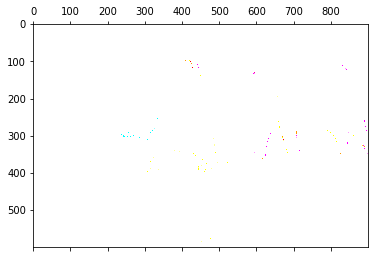

In [158]:
# 히트맵 강도를 0.4로 해서 원본과 겹치기
superimposed_img = heatmap *0.4 + img

plt.matshow(superimposed_img)

In [156]:
heatmap

array([[[176,   0,   0],
        [176,   0,   0],
        [176,   0,   0],
        ...,
        [236,   0,   0],
        [236,   0,   0],
        [236,   0,   0]],

       [[176,   0,   0],
        [176,   0,   0],
        [176,   0,   0],
        ...,
        [236,   0,   0],
        [236,   0,   0],
        [236,   0,   0]],

       [[176,   0,   0],
        [176,   0,   0],
        [176,   0,   0],
        ...,
        [236,   0,   0],
        [236,   0,   0],
        [236,   0,   0]],

       ...,

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]]

In [157]:
img

array([[[234, 214, 196],
        [233, 213, 195],
        [233, 213, 195],
        ...,
        [220, 201, 188],
        [220, 201, 188],
        [220, 201, 188]],

       [[234, 214, 196],
        [234, 214, 196],
        [233, 213, 195],
        ...,
        [219, 200, 187],
        [219, 200, 187],
        [219, 200, 187]],

       [[234, 214, 196],
        [234, 214, 196],
        [233, 213, 195],
        ...,
        [219, 200, 187],
        [219, 200, 187],
        [219, 200, 187]],

       ...,

       [[ 99, 150, 142],
        [ 57, 110, 101],
        [ 48, 101,  91],
        ...,
        [ 56,  96,  91],
        [ 85, 125, 120],
        [ 80, 120, 115]],

       [[ 66, 121, 112],
        [ 44, 100,  89],
        [ 65, 124, 110],
        ...,
        [ 75, 115, 110],
        [ 81, 121, 116],
        [ 62, 102,  97]],

       [[ 75, 130, 121],
        [ 53, 109,  98],
        [ 66, 125, 111],
        ...,
        [ 65, 105, 100],
        [ 64, 104,  99],
        [ 69, 109, 104]]